# Software de estimación de medidas biométricas de ganado ovino a través del Kinect

In [1]:
# Librerias y archivos de trabajo

import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy
import cv2 as cv

In [1531]:

#Grande
folder='20210331-120456'
file='img_rgb_3'

#folder='20210329-120750'
#file='img_rgb_2'

#folder='20210329-114715'
#file='img_rgb_2'

#folder='20210329-120520'
#file='img_rgb_2'


file_png=folder+'/'+file+'.png'
file_npy=folder+'/'+file+'.npy'

# Imagen en escala RGB

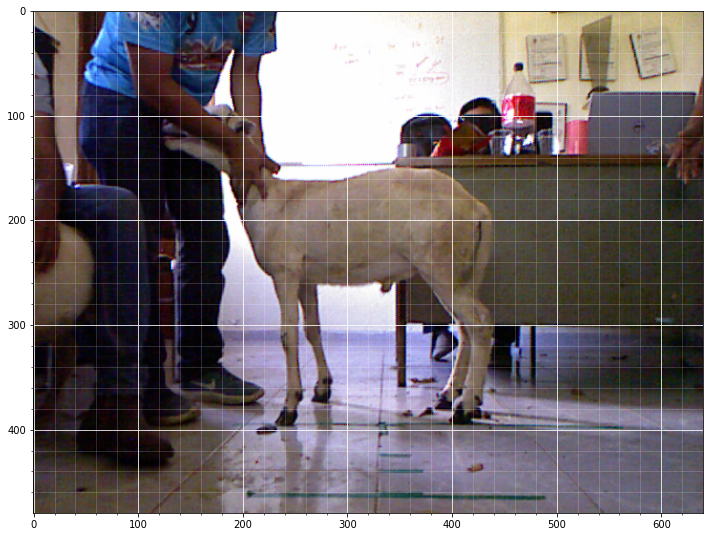

In [1532]:
img = cv.imread(file_png)
#img = cv.flip(img, 5)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,11))
plt.imshow(img)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

# Imagen en escala original

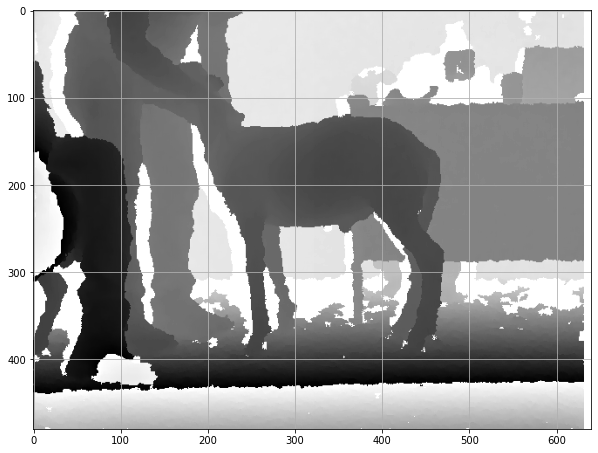

In [1533]:
img_npy = np.load(file_npy)
img_npy_gr= img_npy.astype(np.uint8)
#img_npy_gr= cv.flip(img_npy_gr, 1)


plt.figure(figsize=(10,10))
plt.imshow(img_npy_gr,cmap="gray")
#plt.colorbar()
plt.grid()
plt.show()

In [1534]:
z_distancia_raw= np.median(np.min(img_npy[100:300,200:500],axis=1))
z_distancia_cm=int(100/(-0.00307 * z_distancia_raw + 3.33))
print("promedio:",z_distancia_cm)

minDistance = -10
#scaleFactor = 0.0021
scaleFactor = 0.00187098
lista_x=[]
lista_y=[]
lista_z=[]
w=640
h=480
profundidad = []


lim_z_inf=z_distancia_cm - 12
lim_z_sup=z_distancia_cm + 20

lim_x_inf=20
lim_x_sup=150  

lim_y_inf=84
lim_y_sup=180  



for i in range(np.shape(img_npy)[0]) :
    for j in range(np.shape(img_npy)[1]) :
        z=img_npy[i,j]
        z=100/(-0.00307 * z + 3.33)
        y =+100 - (i - w / 2) * (z + minDistance) * scaleFactor
        x =+100 - (j - h / 2) * (z + minDistance) * scaleFactor
           
        if z <lim_z_inf or z > lim_z_sup or y<lim_y_inf or  y > lim_y_sup or x >lim_x_sup or  x < lim_x_inf :
            z=0

        if z>=lim_z_inf and z<=lim_z_sup:
            lista_x.append(x)
            lista_y.append(y)
            lista_z.append(z)          

        profundidad.append(z)

promedio: 132


(480, 640)
[134.70670463 134.78287344 134.2559682  ...  23.83910348  23.62929384
  23.41948421]
[115. 115. 114. ...   4.   4.   3.]
Delta_x: 130
Delta_y: 96


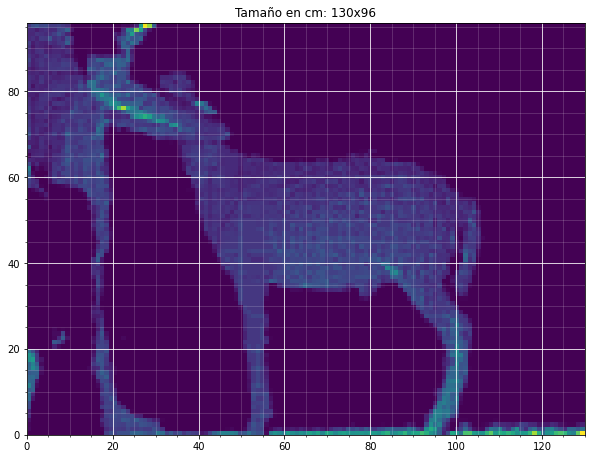

In [1535]:
from mpl_toolkits import mplot3d

arr = np.array(profundidad)
newarr = arr.reshape(480, 640)
print(np.shape(newarr))

arr_x = np.array(lista_x)
arr_y = np.array(lista_y)
print(arr_x)

arr_x = np.round(np.array(lista_x)*1,0)  - np.round(np.min(arr_x),0)
arr_y = np.round(np.array(lista_y)*1,0)  - np.round(np.min(arr_y),0)
print(arr_x)

# Creating bins 
x_min = np.min(arr_x) 
x_max = np.max(arr_x) 
  
y_min = np.min(arr_y) 
y_max = np.max(arr_y) 

Delta_x = int(round(x_max  - x_min,0) )
Delta_y = int(round(y_max  - y_min,0) )
  
x_bins = np.linspace(x_min, x_max, int(Delta_x)) 
y_bins = np.linspace(y_min, y_max, int(Delta_y)) 
 

print("Delta_x:",Delta_x)
print("Delta_y:",Delta_y)
  
# Creating plot 
plt.figure(figsize=(10,10))

arr_x = (arr_x - arr_x*2)+x_max

plt.hist2d(arr_x, arr_y, bins =[x_bins, y_bins]) 
plt.title("Tamaño en cm: "+str(Delta_x) + "x"+str(Delta_y)) 

plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.axis('scaled')

plt.show()

In [1536]:
img_bw = np.zeros(   (   int(Delta_y) +1, int(Delta_x)+1  )  )  
for i in range(len(arr_y)):
    if img_bw[ int(arr_y[i])][int(arr_x[i]) ] == 0 :
        img_bw[ int(arr_y[i])][int(arr_x[i]) ] = 10
    elif img_bw[ int(arr_y[i])][int(arr_x[i]) ] == 10 :
        img_bw[ int(arr_y[i])][int(arr_x[i]) ] = 20
    elif img_bw[ int(arr_y[i])][int(arr_x[i]) ] == 20 :
        img_bw[ int(arr_y[i])][int(arr_x[i]) ] = 30
    elif img_bw[ int(arr_y[i])][int(arr_x[i]) ] >= 30 :
        img_bw[ int(arr_y[i])][int(arr_x[i]) ] = 40
    elif img_bw[ int(arr_y[i])][int(arr_x[i]) ] >= 40 :
        img_bw[ int(arr_y[i])][int(arr_x[i]) ] = 255
img_bw = cv.flip(img_bw, 0)
img_bw

array([[20., 20., 40., ...,  0.,  0.,  0.],
       [30., 40., 40., ...,  0.,  0.,  0.],
       [40., 40., 40., ...,  0.,  0.,  0.],
       ...,
       [30.,  0.,  0., ..., 40., 40., 40.],
       [ 0.,  0.,  0., ..., 40., 40., 40.],
       [ 0.,  0.,  0., ..., 40., 40., 40.]])

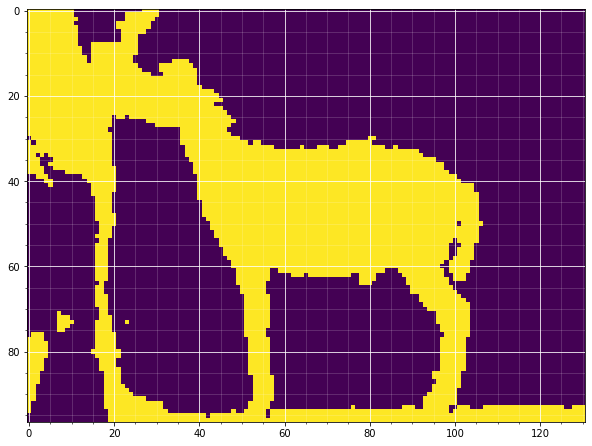

In [1537]:
img_bw = img_bw.astype(np.uint8)
thresh = 10
ret,img_bw = cv.threshold(img_bw, thresh, 255, cv.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.imshow(img_bw)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.axis('scaled')
plt.show()

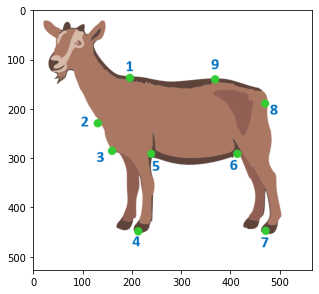

56 , 33
44 , 48
49 , 59
53 , 96
56 , 60
86 , 59
94 , 95
100 , 40
85 , 34
9


In [1538]:
from pynput.keyboard import Key, Controller
import time

keyboard = Controller()
counter = 0 
circles = np.zeros((9,2),np.int) #Num puntos , coordenadas
color_c=(0,255,2)
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global counter
    global color_c
    global plantilla
    if event == cv.EVENT_LBUTTONDOWN:
        circles[counter] = x,y
        print(x,",",y)
        counter = counter + 1
        if counter == 9:
            print(9)
            #color_c=(0,0,255)      
            plantilla = cv.putText(plantilla,"Presionar ESC", 
                           (plantilla.shape[0]-int((plantilla.shape[0])*0.7), 
                            plantilla.shape[1]-int((plantilla.shape[1])*0.8)),
                           cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,2))

        cv.circle(plantilla,(x,y),1,color_c,-1)

# Create a window and bind the function to window
plantilla = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
height, width = plantilla.shape[:2]
cv.namedWindow("Original", cv.WINDOW_NORMAL)
cv.resizeWindow("Original", width*5, height*5)
cv.setMouseCallback("Original",draw_circle)

plt.figure(figsize=(5,5))
img = cv.imread("IMagenes/puntosInteres.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

while(1):
    cv.imshow("Original", plantilla)    
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()


In [1539]:
#Calculos de longitudes

# 0-3 Altura a la cruz [AC]
ACx=circles[0][0] - circles[3][0]  
ACy=circles[0][1] - circles[3][1]
AC=round(np.sqrt( ACy*ACy + ACx*ACx ), 1)

#0-4 Profundidad de costilla [PC]
PCx=circles[0][0] - circles[4][0]  
PCy=circles[0][1] - circles[4][1]
PC=round(np.sqrt( PCy*PCy + PCx*PCx ), 1)

#0-8 Largo del cuerpo [LC]
LCx=circles[0][0] - circles[8][0]  
LCy=circles[0][1] - circles[8][1]
LC=round(np.sqrt( LCy*LCy + LCx*LCx ), 1)

#2-8 Largo del cuerpo en diagonal [LCD]
LCDx=circles[2][0] - circles[8][0]  
LCDy=circles[2][1] - circles[8][1]
LCD=round(np.sqrt( LCDy*LCDy + LCDx*LCDx ), 1)

#5-8 Altura al anca [AA]
AAx=circles[5][0] - circles[8][0]  
AAy=circles[5][1] - circles[8][1]
AA=round(np.sqrt( AAy*AAy + AAx*AAx ), 1)

#6-8 Profundidad de anca [PA]
PAx=circles[6][0] - circles[8][0]  
PAy=circles[6][1] - circles[8][1]
PA=round(np.sqrt( PAy*PAy + PAx*PAx ), 1)

#1-7 Largo de cuerpo total [LCT]
LCTx=circles[1][0] - circles[7][0]  
LCTy=circles[1][1] - circles[7][1]
LCT=round(np.sqrt( LCTy*LCTy + LCTx*LCTx ), 1)


print("Altura a la cruz:", AC, "cm")
print("Profundidad de costilla:", PC, "cm")
print("Largo del cuerpo:", LC, "cm")
print("Largo del cuerpo en diagonal:", LCD, "cm")
print("Altura al anca:", AA, "cm")
print("Profundidad de anca:", PA, "cm")
print("Largo de cuerpo total", LCT, "cm")


Altura a la cruz: 63.1 cm
Profundidad de costilla: 27.0 cm
Largo del cuerpo: 29.0 cm
Largo del cuerpo en diagonal: 43.8 cm
Altura al anca: 25.0 cm
Profundidad de anca: 61.7 cm
Largo de cuerpo total 56.6 cm


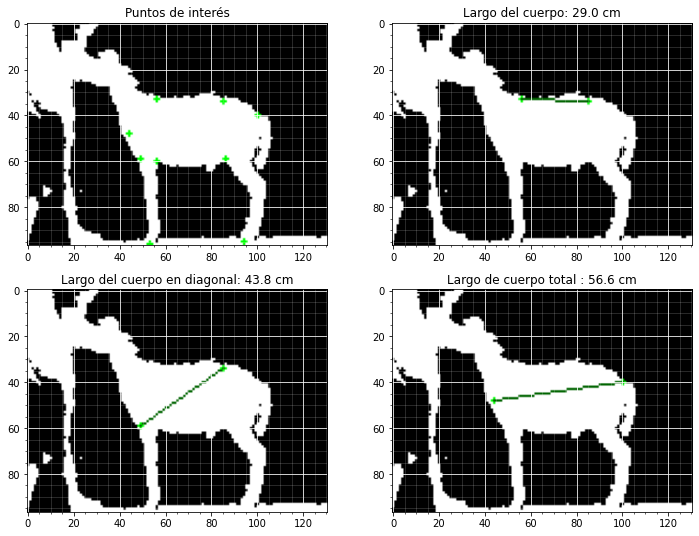

In [1540]:
plantilla_rgb = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
plt.figure(figsize=(12,9))
#0-3 Altura a la cruz [AC]
#0-4 Profundidad de costilla [PC]
#0-8 Largo del cuerpo [LC]
#2-8 Largo del cuerpo en diagonal [LCD]
#5-8 Altura al anca [AA]
#6-8 Profundidad de anca [PA]
#1-7 Largo de cuerpo total [LCT]

plt.subplot(2,2,1)
#Puntos de interes
plantilla_rgb_PI = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
for xi in range (9):
    cv.circle( plantilla_rgb_PI, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_PI)
plt.title("Puntos de interés")

plt.subplot(2,2,2)
#0-8 Largo del cuerpo [LC]
plantilla_rgb_LC = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
P1=0
P2=8

color = (0, 100, 0)
thickness = 1
for xi in [P1,P2]:
    cv.circle(plantilla_rgb_LC, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plantilla_rgb_LC = cv.line(plantilla_rgb_LC, 
                        (circles[P1][0] ,circles[P1][1]), 
                        (circles[P2][0] ,circles[P2][1]),
                        color, thickness)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_LC)
plt.title("Largo del cuerpo: " + str(LC) + " cm")


plt.subplot(2,2,3)
#2-8 Largo del cuerpo en diagonal [LCD]
plantilla_rgb_LCD = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
P1=2
P2=8

color = (0, 100, 0)
thickness = 1
for xi in [P1,P2]:
    cv.circle(plantilla_rgb_LCD, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plantilla_rgb_LCD = cv.line(plantilla_rgb_LCD, 
                        (circles[P1][0] ,circles[P1][1]), 
                        (circles[P2][0] ,circles[P2][1]),
                        color, thickness)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_LCD)
plt.title("Largo del cuerpo en diagonal: " + str(LCD) + " cm")


plt.subplot(2,2,4)
#1-7 Largo de cuerpo total [LCT]
plantilla_rgb_LCT = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
P1=1
P2=7
for xi in [P1,P2]:
    cv.circle(plantilla_rgb_LCT, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plantilla_rgb_LCT = cv.line(plantilla_rgb_LCT, 
                        (circles[P1][0] ,circles[P1][1]), 
                        (circles[P2][0] ,circles[P2][1]),
                        color, thickness)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_LCT)
plt.title("Largo de cuerpo total : " + str(LCT) + " cm")
plt.show()

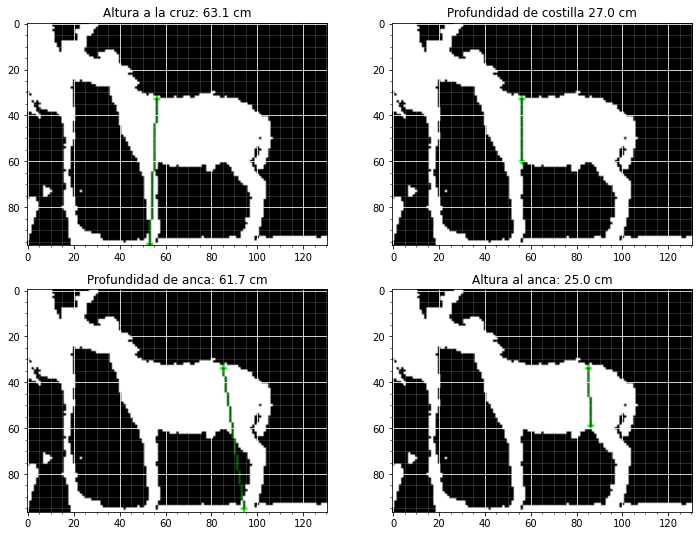

In [1541]:
plantilla_rgb = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
plt.figure(figsize=(12,9))
#0-3 Altura a la cruz [AC]
#0-4 Profundidad de costilla [PC]
#0-8 Largo del cuerpo [LC]
#2-8 Largo del cuerpo en diagonal [LCD]
#5-8 Altura al anca [AA]
#6-8 Profundidad de anca [PA]
#1-7 Largo de cuerpo total [LCT]

plt.subplot(2,2,1)
#0-3 Altura a la cruz [AC]
plantilla_rgb_AC = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
P1=0
P2=3
for xi in [P1,P2]:
    cv.circle(plantilla_rgb_AC, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plantilla_rgb_AC = cv.line(plantilla_rgb_AC, 
                        (circles[P1][0] ,circles[P1][1]), 
                        (circles[P2][0] ,circles[P2][1]),
                        color, thickness)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_AC)
plt.title("Altura a la cruz: " + str(AC) + " cm")


plt.subplot(2,2,2)
#0-4 Profundidad de costilla [PC]
plantilla_rgb_PC = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
P1=0
P2=4
for xi in [P1,P2]:
    cv.circle(plantilla_rgb_PC, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plantilla_rgb_PC = cv.line(plantilla_rgb_PC, 
                        (circles[P1][0] ,circles[P1][1]), 
                        (circles[P2][0] ,circles[P2][1]),
                        color, thickness)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_PC)
plt.title("Profundidad de costilla " + str(PC) + " cm")


plt.subplot(2,2,4)
#5-8 Altura al anca [AA]
plantilla_rgb_AA = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
P1=5
P2=8
for xi in [P1,P2]:
    cv.circle(plantilla_rgb_AA, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plantilla_rgb_AA = cv.line(plantilla_rgb_AA, 
                        (circles[P1][0] ,circles[P1][1]), 
                        (circles[P2][0] ,circles[P2][1]),
                        color, thickness)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_AA)
plt.title("Altura al anca: " + str(AA) + " cm")


plt.subplot(2,2,3)
#6-8 Profundidad de anca [PA]
plantilla_rgb_PA = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
P1=6
P2=8
for xi in [P1,P2]:
    cv.circle(plantilla_rgb_PA, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )
plantilla_rgb_PA = cv.line(plantilla_rgb_PA, 
                        (circles[P1][0] ,circles[P1][1]), 
                        (circles[P2][0] ,circles[P2][1]),
                        color, thickness)
plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_rgb_PA)
plt.title("Profundidad de anca: " + str(PA) + " cm")
plt.show()

area: 1149


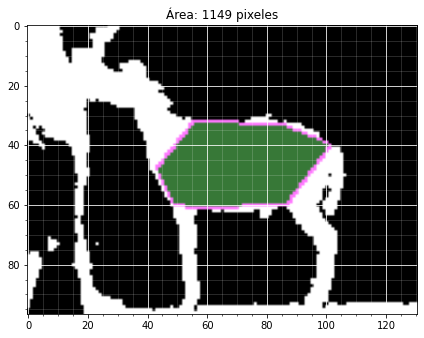

In [1542]:
plantilla_area = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 
plt.figure(figsize=(7,7))

#0-1-2-4-5-7-8 : Área  

puntos = []
for xi in [0,1,2,4,5,7,8]:
    puntos.append(  [circles[xi][0],circles[xi][1]] )
    
puntos_area = np.array([puntos], np.int32)

contour = np.array([puntos])
area = int(cv.contourArea(contour))
print("area:", area)

plantilla_area = cv.cvtColor(img_bw,cv.COLOR_GRAY2RGB) 

for xi in [0,1,2,4,5,7,8]:
    cv.circle(plantilla_area, ( circles[xi][0],circles[xi][1] ), 1, (0,255,2),cv.FILLED  )

plantilla_area = cv.polylines(plantilla_area, [puntos_area], True, (255,120,255),2            ) 
plantilla_area = cv.fillPoly(plantilla_area, [puntos_area], (55,120,55))    

plt.grid(b=True, which='major', color='white', linestyle='-')
plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.imshow(plantilla_area)
plt.title("Área: " + str(area) + " pixeles")
plt.show()
